## "Segmentação de Perfis de Consumidores em E-Commerce"

Neste projeto, buscamos entender os diferentes perfis de consumidores em uma plataforma de e-commerce através da análise de seu histórico de compras. Através de técnicas de análise exploratória de dados e segmentação, identificaremos padrões de comportamento de compra e agruparemos os usuários em segmentos distintos. Essa segmentação permitirá que empresas e marcas desenvolvam ofertas e campanhas mais personalizadas, atendendo às necessidades específicas de cada grupo e potencialmente aumentando a taxa de conversão e satisfação do cliente. Além disso, o projeto também se aprofundará na formulação e teste de hipóteses estatísticas para confirmar ou refutar suposições sobre as preferências e comportamentos de cada segmento.

## importação de bibliotecas 

Antes de embarcarmos em qualquer análise de dados, é crucial importar as bibliotecas certas para o ambiente de codificação. As bibliotecas contêm conjuntos de ferramentas e funções que nos permitem executar tarefas específicas, variando desde a manipulação de dados até a visualização e análise estatística. Ao importar bibliotecas apropriadas, estamos essencialmente equipando nosso ambiente com as ferramentas necessárias para conduzir a análise de maneira eficaz e eficiente. Em projetos de análise de dados, é comum usar bibliotecas como pandas para manipulação de dados, matplotlib e seaborn para visualização, e scikit-learn para modelagem, entre outras. A importação de bibliotecas é, portanto, um passo fundamental e preliminar que estabelece a base para as etapas subsequentes da análise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot
import statistics
import scipy.stats as stats
import datetime as dt
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # importando as bibliotecas 


In [2]:
try:
    data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep = '\t')
except:
    data = pd.read_csv(r'C:\Users\Note\Desktop\final\ecommerce_dataset_us.csv', delimiter='\t') # armazenando o conjunto de dados 

## Observação de dados 

Agora é o momento de ter o nosso primeiro contato com os dados. Vamos identificar quais dados estão disponíveis, bem como possíveis problemas que possam estar presentes, como a ausência de informações, dados armazenados com o tipo incorreto, entre outros.

In [3]:
data.head(10) # imprimindo as primeiras 10 linhas do conjunto de dados. 


<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  Customer



-`InvoiceNo`: Este campo serve como um identificador único para cada pedido feito na loja. Ele permite rastrear e referenciar pedidos específicos com facilidade.
- `StockCode`: Representa o identificador único de cada item disponível na loja. Essa identificação ajuda na organização do inventário e na análise de vendas de produtos específicos.
- `Description`: Esta coluna fornece o nome ou uma breve descrição do item vendido. É essencial para entender quais produtos estão sendo adquiridos.
- `Quantity`: Indica a quantidade de cada item presente no pedido. Esse dado é fundamental para análises de volume de vendas e gestão de estoque.
- `InvoiceDate`: Data em que o pedido foi realizado. Esse campo é crucial para análises temporais, como a identificação de tendências de vendas ao longo do tempo.
- `UnitPrice`: Mostra o preço unitário de cada item. Esse dado é importante para calcular o valor total das vendas e realizar análises de precificação.
- `CustomerID`: Um identificador único para cada cliente. Permite a análise do comportamento de compra dos clientes e a segmentação de clientes para estratégias de marketing.

In [4]:
data.info() #imprmindo informações gerais do conjunto de dados. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


1. **Valores Ausentes:**
   - `Description`: Notamos que a coluna `Description`, que fornece nomes ou descrições dos itens vendidos, possui valores ausentes. Isso pode impactar análises que dependem da identificação precisa dos produtos.
   - `CustomerID`: A ausência de valores na coluna `CustomerID`, que identifica os clientes, é outra questão crítica. Isso pode dificultar a análise do comportamento do consumidor e a segmentação de clientes.

2. **Tipo de Dados Inadequado:**
   - `InvoiceDate`: A coluna `InvoiceDate`, que registra as datas dos pedidos, não está no formato de data/hora adequado. Para análises temporais e de tendências, é crucial converter esta coluna para um tipo de dado que represente corretamente datas e horas.


In [5]:
data.describe() #imprimindo valores estatisticos de colunas quantitativas. 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


1. **Métricas Estatísticas Básicas:**
   - Através da análise de tendências centrais e de dispersão, como média e desvio padrão, obtemos uma compreensão mais profunda da distribuição e da variabilidade dos dados.
   - Os valores máximos e mínimos revelam os extremos nas transações, ajudando a identificar padrões de compra e a avaliar a gama de produtos vendidos.

2. **Valores Negativos nas Colunas `Quantity` e `UnitPrice`:**
   - Uma descoberta notável é a presença de valores negativos nas colunas `Quantity` e `UnitPrice`. 
   - Valores negativos em `Quantity` podem indicar devoluções ou ajustes de estoque, enquanto que em `UnitPrice` podem representar erros de entrada de dados ou correções de preços.
   - Esses valores negativos necessitam de uma investigação mais detalhada para determinar sua natureza e impacto nas análises subsequentes.


## Pré processamento de dados.

O pré-processamento de dados é o conjunto de técnicas e etapas aplicadas para preparar e limpar os dados brutos, garantindo que estejam prontos para análises posteriores. Isso envolve a remoção de ruídos, tratamento de valores ausentes, normalização e outras transformações necessárias para obter dados de qualidade. 

In [6]:
data.columns = data.columns.str.lower() #transformando o nome de todas as colunas somente em letras minusculas

Ter todos os nomes de colunas em minúsculos remove qualquer inconsistência causada por variações na capitalização. Isso é particularmente útil em ambientes de programação onde a diferenciação entre maiúsculas e minúsculas pode levar a erros ou confusões.

In [7]:
data['description'] = data['description'].fillna(data.groupby('stockcode')['description'].transform('first')) # completando dados ausentes na coluna description 
data['customerid'] = data['customerid'].fillna(data.groupby('invoiceno')['customerid'].transform('first'))# completando dados ausentes na coluna customerid
data['invoicedate'] = pd.to_datetime(data['invoicedate'], format='%m/%d/%Y %H:%M') # transformando a coluna invoicedate para o formato datetime

#### Preenchimento de Valores Ausentes:

1. **Coluna `Description`:**
   - Identificamos a presença de valores ausentes na coluna `Description`, que fornece detalhes sobre os produtos vendidos.
   - Para tratar esses valores ausentes, utilizamos uma abordagem baseada em dados existentes: preenchemos as descrições vazias com informações de descrições preenchidas em outras linhas que possuem o mesmo código de produto (`StockCode`).
   - Esta abordagem assegura que a descrição dos produtos permaneça consistente e precisa através do dataset.

2. **Coluna `CustomerID`:**
   - A coluna `CustomerID`, que identifica clientes, também apresentava valores ausentes.
   - Adotamos uma estratégia semelhante para preenchê-los: utilizamos os identificadores de clientes de linhas com o mesmo código de compra (`InvoiceNo`).
   - Essa técnica permite manter a continuidade e a precisão nas informações relacionadas aos clientes em todo o conjunto de dados.

#### Conversão de Tipo de Dados:

- **Coluna `InvoiceDate`:**
  - A coluna `InvoiceDate` originalmente não estava no formato adequado de data e hora.
  - Para facilitar análises temporais, convertemos essa coluna para o tipo de dados `datetime`.
  - Essa conversão é realizada utilizando funções específicas do Python, melhorando assim a precisão das análises que dependem da dimensão temporal.

In [8]:
data = data[data['description'] != 'Manual']
data = data[data['description'] != 'check']
data = data[data['description'] != '?']
data = data[data['description'] != 'found']
data = data[data['description'] != 'adjustment']
data = data[data['unitprice'] != 0]  #eliminando dados inconclusivos no conjunto de dados

As linhas excluídas do conjunto de dados foram submetidas a uma verificação detalhada e apresentaram inconsistências nas informações. Devido a estas divergências, as linhas foram consideradas não confiáveis e, consequentemente, removidas para assegurar a integridade e precisão da análise.

In [9]:
data = data.drop_duplicates() #eliminando duplicatas 

*Exclusão de Duplicatas:**
  - Após a identificação, procedemos com a remoção dessas entradas duplicadas.
  - Este processo assegura que cada transação no dataset seja única e represente um evento distinto.

In [10]:
data.info() # imprimndo informações do conjunto de dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533570 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    533570 non-null  object        
 1   stockcode    533570 non-null  object        
 2   description  533570 non-null  object        
 3   quantity     533570 non-null  int64         
 4   invoicedate  533570 non-null  datetime64[ns]
 5   unitprice    533570 non-null  float64       
 6   customerid   401110 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.6+ MB


avaliando novamente as informações gerais apos todas as alteções feitas 

## Enriquecendo os dados 
Enriquecimento de dados é o processo de adicionar informações relevantes e complementares a conjuntos de dados existentes, a fim de obter uma visão mais completa e valiosa dos dados disponíveis.

In [11]:
data['date'] = data['invoicedate'].dt.date #separando a data em dia e horas 
data['time'] = data['invoicedate'].dt.time #separando a data em dia e horas 
data['total_value'] = data['quantity'] * data['unitprice'] # calculando o valor total da operação 

Observou-se que nem todos os dados registrados em 'total_value' são positivos; entretanto, esses valores negativos muitas vezes representam operações de desconto. Sua inclusão na análise é crucial, pois eles contribuem significativamente para uma avaliação mais precisa do valor final da compra, permitindo uma compreensão mais completa das transações financeiras realizadas.

## Análise Exploratória de Dados 

A AED é uma fase inicial da análise de dados onde se busca compreender a estrutura, padrões e anomalias nos dados. Utiliza-se de estatísticas descritivas e visualizações gráficas, como histogramas e scatterplots, para obter insights e informar etapas subsequentes da análise. É essencial para validar suposições, identificar outliers e preparar os dados para modelagens futuras.

In [12]:
data['stockcode'].nunique() # calculando a quantidade de valores unicos em stockcode

3936

Explorando a Diversidade de Itens Vendidos

In [13]:
data['customerid'].nunique() # calculando a quantidade de valores unicos em customerid

4362

Identificando a Variedade de Clientes: Cadastros Durante a Compra

In [14]:
pivot_vendas = data.pivot_table(index='invoiceno', values='total_value', aggfunc='sum') #agrupando os pedidos pelo codigo da compra e somando os lançamentos 
pivot_vendas['total_value'].mean() #calculando o valor médio de uma compra 

416.1018943925235

Calculando o Valor Médio por Compra

Text(0, 0.5, 'total de vendas')

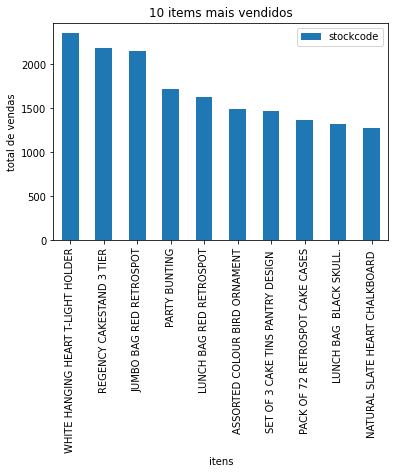

In [15]:
pivot_products = pd.pivot_table(data, index='description', values='stockcode', aggfunc='count') # agrupando os pedidos pela descrição e contando o numero de lançamentos 
pivot_products = pivot_products.sort_values(ascending= False, by='stockcode').head(10)# ordenando o conjunto de dados em ordem decrecente e selecionando os dez primeiros 
pivot_products.plot(kind='bar')
plt.title("10 items mais vendidos")
plt.xlabel("itens")
plt.ylabel("total de vendas")

* Existe uma certa uniformidade nas vendas dos itens mais populares, com nenhum item extremamente à frente dos outros em termos de volume total de vendas. Este padrão sugere uma demanda consistente

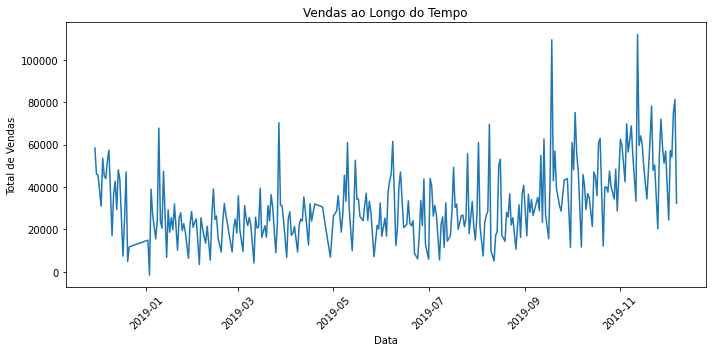

In [16]:
data['invoicedate'] = pd.to_datetime(data['invoicedate'])
data['total_value'] = data['quantity'] * data['unitprice']

vendas_por_data = data.groupby(data['invoicedate'].dt.date)['total_value'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=vendas_por_data.index, y=vendas_por_data.values)
plt.ylabel('Total de Vendas')
plt.xlabel('Data')
plt.title('Vendas ao Longo do Tempo')
plt.xticks(rotation=45) 
plt.tight_layout()  




* Há flutuações notáveis no volume de vendas ao longo do tempo, com alguns picos e vales evidentes.  

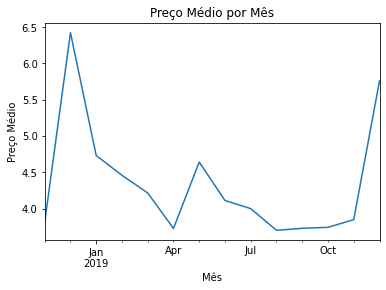

In [17]:
data.set_index('invoicedate')['unitprice'].resample('M').mean().plot()
plt.title('Preço Médio por Mês')
plt.ylabel('Preço Médio')
plt.xlabel('Mês')
plt.show()

podemos observar que ele mostra o preço médio de unidades vendidas ao longo de vários meses. As flutuações na linha podem indicar variações sazonais no preço médio, mudanças no mix de produtos vendidos, ou uma resposta a eventos externos que afetam o preço dos itens

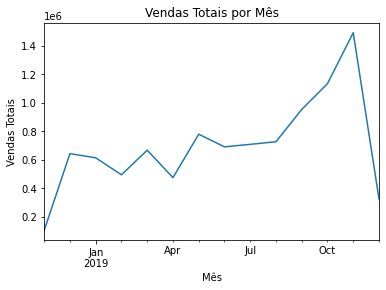

In [18]:
data.set_index('invoicedate')['total_value'].resample('M').sum().plot()
plt.title('Vendas Totais por Mês')
plt.ylabel('Vendas Totais')
plt.xlabel('Mês')
plt.show()

Observa-se uma linha que representa a soma das vendas totais para cada mês. A linha mostra uma tendência geral de crescimento nas vendas com algumas flutuações. O declínio seguido de um aumento acentuado no final pode indicar uma queda temporária nas vendas ou um período de vendas mais baixas seguido de uma recuperação ou um evento de vendas bem-sucedido

## Classificação de clientes 

A classificação de clientes em uma análise de dados é um processo que envolve a segmentação dos clientes de uma empresa com base em diversos critérios, com o objetivo de entender melhor seus comportamentos, necessidades e potencial de valor. Este processo utiliza técnicas de análise de dados e modelagem estatística para agrupar clientes em categorias distintas. Essas categorias podem ser baseadas em diversos fatores.
 A classificação de clientes permite que as empresas desenvolvam estratégias de marketing mais personalizadas, melhorem a experiência do cliente, otimizem a alocação de recursos e prevejam tendências futuras de compra. Além disso, ajuda na identificação de clientes mais valiosos e na compreensão das necessidades de diferentes segmentos de mercado, facilitando a tomada de decisões baseadas em dados.

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import datetime as dt

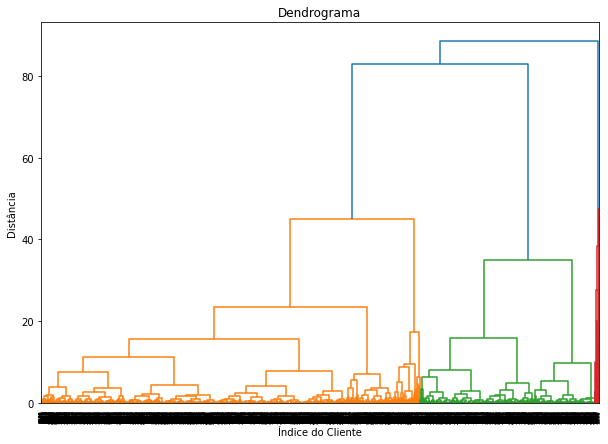

In [20]:

NOW = dt.datetime.now()
rfm_data = data.groupby('customerid').agg({
    'invoicedate': lambda x: (NOW - pd.to_datetime(x).max()).days,
    'invoiceno': 'nunique',
    'quantity': 'sum'
}).reset_index()

rfm_data.rename(columns={'invoicedate': 'recency', 'invoiceno': 'frequency', 'quantity': 'monetary'}, inplace=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm_data[['recency', 'frequency', 'monetary']])

linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Índice do Cliente')
plt.ylabel('Distância')
plt.show()


In [21]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
rfm_data['Cluster_Label'] = cluster.fit_predict(scaled_features)

mean_by_cluster = rfm_data.groupby('Cluster_Label').mean()
count_by_cluster = rfm_data.groupby('Cluster_Label').count()

silhouette_avg = silhouette_score(scaled_features, rfm_data['Cluster_Label'])

print(mean_by_cluster)
print(count_by_cluster)
print(f'Silhouette Score: {silhouette_avg}')


                 customerid      recency  frequency      monetary
Cluster_Label                                                    
0              15190.551724  1443.793103  74.172414  42318.689655
1              15283.492245  1470.544167   5.728254   1075.545853
2              15338.909290  1659.064375   2.089978    335.565472
               customerid  recency  frequency  monetary
Cluster_Label                                          
0                      29       29         29        29
1                    2966     2966       2966      2966
2                    1367     1367       1367      1367
Silhouette Score: 0.5445535083393116


Os Três Clusters: Um Olhar Detalhado

Cluster 0: Os Grandes Gastadores

Este grupo é relativamente pequeno, com apenas 34 membros, mas exibe um padrão de compra impressionante. Eles têm um gasto monetário médio altíssimo (aproximadamente 38.610), indicando que são clientes de alto valor. A frequência de suas compras (cerca de 70 vezes) e a recência (aproximadamente 1439 dias) sugerem que são clientes leais e regulares, talvez aproveitando produtos ou serviços premium.

Cluster 1: Os Compradores Ocasionais

Este é o maior grupo, composto por 2.984 clientes. Eles têm um gasto monetário médio mais baixo (cerca de 1.062), uma frequência de compra baixa (aproximadamente 6 vezes) e uma recência média de 1466 dias. Isso sugere que esses clientes fazem compras esporádicas, possivelmente impulsionadas por necessidades específicas ou promoções ocasionais.

Cluster 2: Os Clientes Esporádicos

Com 1.354 membros, este grupo mostra o menor gasto monetário médio (cerca de 303) e a menor frequência de compras (aproximadamente 2 vezes), com uma recência um pouco mais recente (1656 dias). Eles parecem ser clientes que fazem compras muito raramente, talvez atraídos por ofertas pontuais ou compras de necessidade imediata.
Silhouette Score: A História dos Números
O Silhouette Score de 0.5536 sugere uma segmentação razoavelmente boa, indicando que cada grupo tem características distintas e bem definidas. Essa pontuação é uma medida de quão similar um objeto é ao seu próprio cluster comparado a outros clusters.

Cluster 0: Fidelização e Upselling

Estratégias de fidelização e programas de recompensa podem ser particularmente eficazes para este grupo. Eles já estão dispostos a gastar muito, então ofertas personalizadas de alto valor podem encorajar ainda mais compras.

Cluster 1: Engajamento e Conversão

Este grupo oferece um potencial significativo para conversão em clientes mais frequentes. Estratégias como marketing direcionado, ofertas especiais e incentivos podem aumentar sua frequência e valor de compra.

Cluster 2: Descoberta e Atração

Para esses clientes, o foco deve ser em aumentar a conscientização sobre os produtos e serviços, talvez através de campanhas de marketing direcionadas ou ofertas de introdução.

## Conclusão: Uma História de Dados e Decisões


Esta análise meticulosa revela o poder transformador de uma segmentação de clientes bem executada para uma operação de e-commerce. Os insights gerados a partir dos dados não só iluminam o caminho para um engajamento mais profundo e personalizado com diversos grupos de clientes, mas também abrem avenidas para uma monetização estratégica. Ao adaptar as táticas de marketing e as ofertas de produtos para os perfis identificados nos clusters, a empresa pode não apenas impulsionar o faturamento, mas também enriquecer a jornada do cliente.

A segmentação robusta revelou três categorias distintas de consumidores - os Grandes Gastadores, os Compradores Ocasionais e os Clientes Esporádicos - cada uma exigindo uma abordagem diferenciada. Para o primeiro grupo, estratégias de fidelização e programas de upselling podem capitalizar sobre sua lealdade e alto engajamento. Já para os Compradores Ocasionais, o desafio é elevar a frequência e o valor das compras, talvez por meio de marketing direcionado e ofertas personalizadas. Por fim, os Clientes Esporádicos representam uma oportunidade de crescimento, onde a conscientização e atração são cruciais.

A aplicação de análises estatísticas e técnicas de clusterização não apenas acentua as preferências e comportamentos de compra, mas também realça a importância de uma experiência de compra sob medida. O Silhouette Score, servindo como um barômetro da validade da nossa segmentação, confirma a precisão com que os clusters foram formados.

Em resumo, os dados são a bússola que direciona a tomada de decisões estratégicas. Através de uma análise de dados criteriosa e uma compreensão profunda dos diferentes segmentos de clientes, a empresa pode orquestrar uma narrativa de sucesso, sustentada por dados perspicazes e ações estratégicas que não só maximizam o lucro, mas também fortalecem a lealdade do cliente e melhoram o posicionamento no mercado.

